In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

<Figure size 640x480 with 0 Axes>

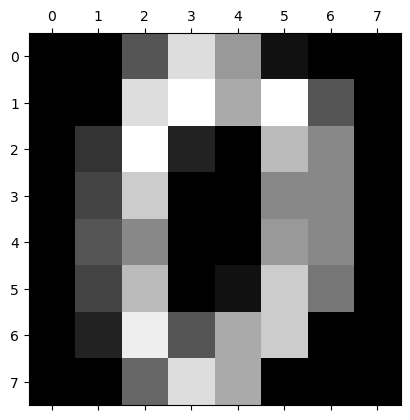

In [6]:
plt.gray()
for i in range(1):
    plt.matshow(digits.images[i])

In [8]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [16]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train, Y_test = train_test_split(df.drop(['target'],axis=1), df.target, test_size=0.2)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1474,0.0,2.0,10.0,16.0,16.0,2.0,0.0,0.0,0.0,10.0,...,11.0,0.0,0.0,0.0,11.0,16.0,16.0,13.0,3.0,0.0
275,0.0,0.0,4.0,14.0,16.0,15.0,1.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,16.0,2.0,0.0,0.0,0.0
352,0.0,0.0,3.0,10.0,12.0,12.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,16.0,15.0,3.0,0.0,0.0
314,0.0,0.0,3.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,2.0,13.0,16.0,14.0,4.0,0.0
335,0.0,0.0,7.0,15.0,9.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,15.0,11.0,1.0,0.0,0.0


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=64)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=64)

In [37]:
model.score(X_test,Y_test)

0.9777777777777777

In [39]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 36,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26]], dtype=int64)

Text(120.72222222222221, 0.5, 'Actual/Truth')

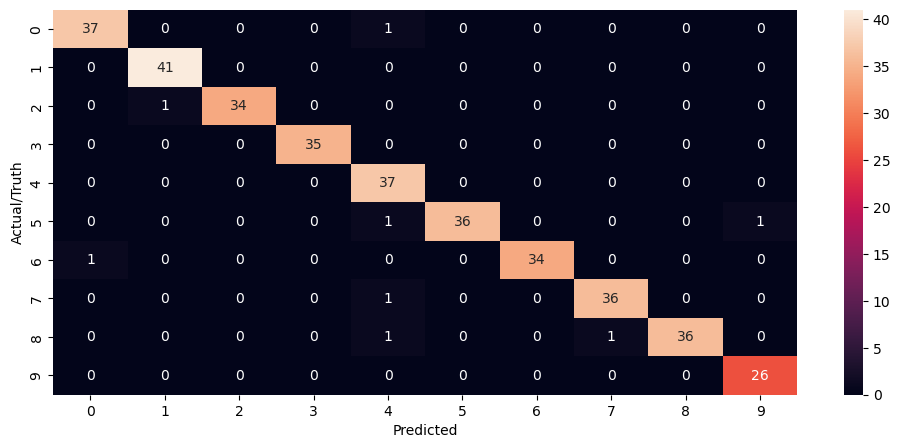

In [42]:
from seaborn import heatmap
plt.figure(figsize=(12,5))
heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual/Truth")